# The SciPy Library

- The SciPy Library includes modules for
    - optimization,
    - interpolation,
    - signal processing,
    - linear algebra,
    - sparse matrix representation,
    - KD-Trees, Delaunay triangulation, convex hull computation
    - statistics, and others

The SciPy library includes modules for optimization, interpolation, signal processing, linear algebra, statistics, sparse matrix representation and operation, among others. It also includes the `spatial` module, containing an implementations for the KD-Tree data structure (used on nearest-neighbor queries), Delaunay triangulation and convex hull computation.

## Optimization

- The `optimize` module presents algorithms for
    - function minimization
        - Broyden-Fletcher-Goldfarb-Shanno (BFGS)
        - simulated annealing
        - least-squares
        - Newton conjugate gradient
    - root finding
    - fitting

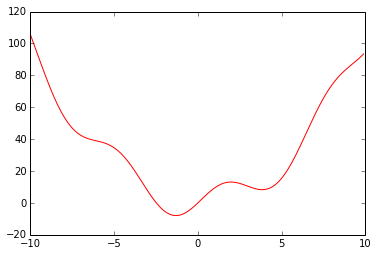

In [18]:
def f(x):
    return x**2 + 10 * sin(x)

x = arange(-10, 10, 0.1)
plot(x, f(x), 'r-')

### BFGS

In [19]:
from scipy.optimize import fmin_bfgs

xmin = fmin_bfgs(f, 0)
xmin

Optimization terminated successfully.
         Current function value: -7.945823
         Iterations: 5
         Function evaluations: 24
         Gradient evaluations: 8


array([-1.30644003])

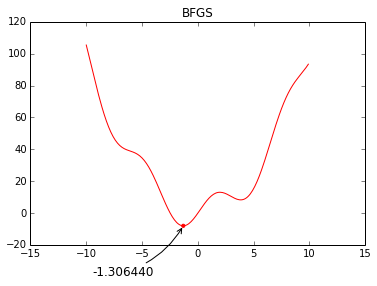

In [20]:
plot(x, f(x), 'r-')
scatter([xmin],[f(xmin)], 10, color='red')
annotate('%f' % xmin, 
        xy=(xmin, f(xmin)), fontsize=12, xycoords='data',
          xytext=(-90, -50), textcoords='offset points',
          arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))
title('BFGS')

#### Problem

Initialization and **local minimima**

In [21]:
xmin = fmin_bfgs(f, 3, disp=0)
xmin

array([ 3.83746663])

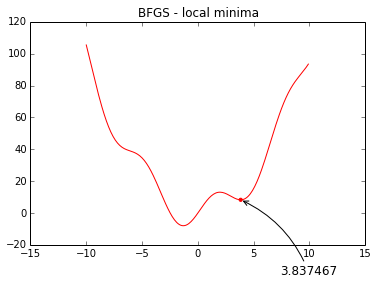

In [22]:
plot(x, f(x), 'r-')
scatter([xmin],[f(xmin)], 10, color='red')
annotate('%f' % xmin, 
        xy=(xmin, f(xmin)), fontsize=12, xycoords='data',
          xytext=(40, -75), textcoords='offset points',
          arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))
title('BFGS - local minima')

#### Brute force

- Compute $f(x)$ for all $x$ in a *grid*

In [23]:
from scipy.optimize import brute
grid = (-10, 10, 0.1)
xmin = brute(f, (grid,))
xmin

array([-1.30641113])

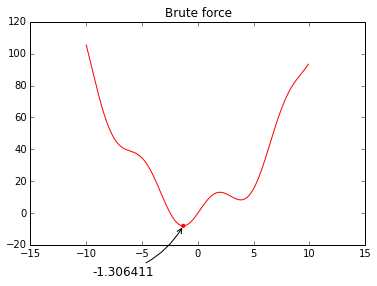

In [24]:
plot(x, f(x), 'r-')
scatter([xmin],[f(xmin)], 10, color='red')
annotate('%f' % xmin, 
        xy=(xmin, f(xmin)), fontsize=12, xycoords='data',
          xytext=(-90, -50), textcoords='offset points',
          arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))
title('Brute force')

#### Simulated Annealing

In [35]:
from scipy.optimize import anneal

xmin, status = anneal(f, 3)
xmin, status

(-1.2167727301519746, 5)

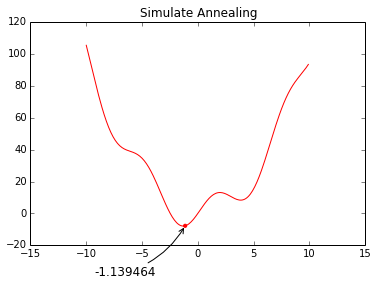

In [31]:
plot(x, f(x), 'r-')
scatter([xmin],[f(xmin)], 10, color='red')
annotate('%f' % xmin, 
        xy=(xmin, f(xmin)), fontsize=12, xycoords='data',
          xytext=(-90, -50), textcoords='offset points',
          arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))
title('Simulate Annealing')

## Linear algebra using `scipy.linalg`

- Linear algebra is particularly important to **projective geometry**
- Consider a 3D point $\mathbf{X}_i$
- Let $\mathrm{\tt P}$ be a **camera matrix**
- The projection of $\mathbf{X}_i$ on the camera plane is $\mathbf{x}_i = \mathrm{\tt P} \mathbf{X}_i$

Linear algebra is an essential mathematical tool for computer vision and machine learning. It is particularly important in problems involving projective geometry as in [multiple 
view computer vision](http://www.robots.ox.ac.uk/~vgg/hzbook/). Consider a 3D point $\mathbf{X}_i$, represented as a *homogeneous* 4-d array, and a projective matrix $\mathrm{\tt P}$, represented as a $3 \times 4$ array and corresponding to a camera. The
projection of $\mathbf{X}_i$ on the camera’s image plane, $\mathbf{x}_i$, can be elegantly coded as:

In [3]:
P = array([[  1.41598501e+03,  -3.53656018e+01,   6.29880366e+02,  -9.80199681e+02],
           [ -1.66130187e+01,   1.52666051e+03,   2.41551888e+02,   2.34435820e+02],
           [ -2.20274424e-01,   4.97475710e-03,   9.75425256e-01,   6.34871255e-01]])

X = array([-0.11652141, -0.24440939,  3.23347243,  1.])

x = dot(P, X)
x

array([ 900.15223192,  644.29279864,    3.81333274])

The `dot` function, for 2-D arrays, computes the matrix multiplication, and for 1-D arrays it calculates the inner product of vectors. 

The pixel inhomogeneous coordinates can be recovered using:

In [5]:
x_coord = x[0]/x[2]
y_coord = x[1]/x[2]
x_coord, y_coord

(236.05394389057571, 168.95792816629523)

### Singular value decompostion

- Several problems in multiple view geometry involve **over-determined systems of equations**
     - Homography estimation
     - 3D points triangulation
- $A\mathbf{x}$ is a homogeneous systems of linear equations
- Can be solved using **Singular Value Decomposition (SVD)**

Estimation problems in projective geometry involve the solution of over-determined systems of equations. More precisely, these problems are formalized as *linear least-squares*
resolutions of homogeneous systems of linear equations in the form $A\mathbf{x}$, minimizing $A\mathbf{x}$ subject to $\| \mathbf{x} \| = 1$.

The minimization problem can be solved using **singular value decomposition (SVD)**, a matrix decomposition particularly useful in numerical computations. SVD decomposes $A$
as $A = UDV^\intercal$ and the $\mathbf{x}$ solution corresponds to the last columns of $V$.

In [8]:
def dlt_triangulation(ui, Pi, uj, Pj):
    """Hartley & Zisserman, 12.2"""
    ui /= ui[2]
    xi, yi = ui[0], ui[1]
    
    uj /= uj[2]
    xj, yj = uj[0], uj[1]
    
    a0 = xi * Pi[2,:] - Pi[0,:]
    a1 = yi * Pi[2,:] - Pi[1,:]
    a2 = xj * Pj[2,:] - Pj[0,:]
    a3 = yj * Pj[2,:] - Pj[1,:]
    
    A = vstack((a0, a1, a2, a3))   
    U, s, VT = linalg.svd(A)
    V = VT.T    
    
    X3d = V[:,-1]    
       
    return X3d/X3d[3]

Examples of `spatial.KDTree` and `linalg.svd` will be presented in the Structure from Motion example.